In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [49]:
df = pd.read_csv("/content/Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [51]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [52]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [53]:
df['Age'].fillna(df['Age'].median(), inplace=True)

<ipython-input-53-63d4fb902a4f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [54]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

<ipython-input-54-808ebb813aa0>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [55]:
df['Has_Cabin_Info'] = df['Cabin'].notnull().astype(int)

In [56]:
df['Deck'] = df['Cabin'].astype(str).str[0]
df['Deck'].replace('n', np.nan, inplace=True)

<ipython-input-56-fa72f48c09f1>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Deck'].replace('n', np.nan, inplace=True)


In [57]:
df.drop(columns=['Cabin'], inplace=True)

In [58]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [59]:
df = pd.get_dummies(df, columns=['Embarked', 'Deck'], drop_first=True)

In [60]:
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

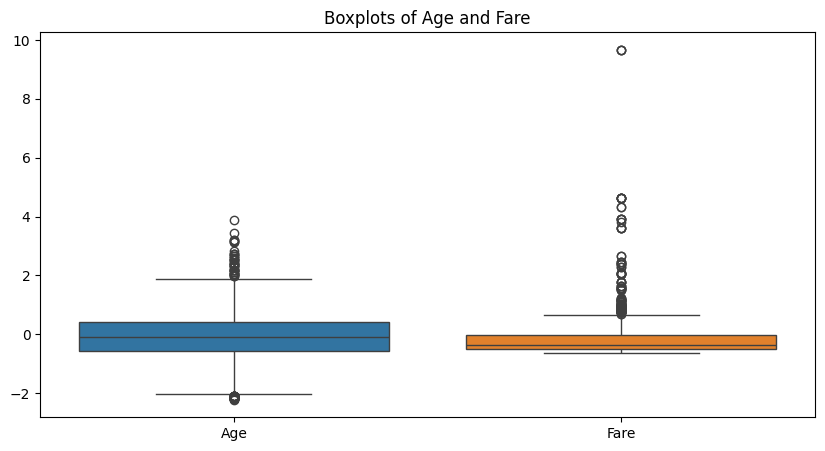

In [61]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['Age', 'Fare']])
plt.title("Boxplots of Age and Fare")
plt.show()

In [62]:
Q1_fare = df['Fare'].quantile(0.25)
Q3_fare = df['Fare'].quantile(0.75)
IQR_fare = Q3_fare - Q1_fare

Q1_age = df['Age'].quantile(0.25)
Q3_age = df['Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age

df = df[
    (df['Fare'] >= Q1_fare - 1.5 * IQR_fare) & (df['Fare'] <= Q3_fare + 1.5 * IQR_fare) &
    (df['Age'] >= Q1_age - 1.5 * IQR_age) & (df['Age'] <= Q3_age + 1.5 * IQR_age)
]


In [63]:
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])


In [64]:
df.to_csv("Cleaned_Titanic.csv", index=False)

In [65]:
print("Data cleaning and preprocessing complete. Saved as Cleaned_Titanic.csv")

Data cleaning and preprocessing complete. Saved as Cleaned_Titanic.csv


In [66]:
df = pd.read_csv("/content/Cleaned_Titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Has_Cabin_Info,Embarked_Q,Embarked_S,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T
0,1,0,3,"Braund, Mr. Owen Harris",0,-0.608518,1,0,A/5 21171,-0.748128,0,False,True,False,False,False,False,False,False,False
1,3,1,3,"Heikkinen, Miss. Laina",1,-0.209117,0,0,STON/O2. 3101282,-0.698326,0,False,True,False,False,False,False,False,False,False
2,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0.689534,1,0,113803,2.634730,1,False,True,False,True,False,False,False,False,False
3,5,0,3,"Allen, Mr. William Henry",0,0.689534,0,0,373450,-0.689103,0,False,True,False,False,False,False,False,False,False
4,6,0,3,"Moran, Mr. James",0,-0.009417,0,0,330877,-0.658978,0,True,False,False,False,False,False,False,False,False
